In [1]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv('All_Motions_HDMO5.csv')

In [6]:
df.head()

,concatenatedData1,concatenatedData2,concatenatedData3,concatenatedData4,concatenatedData5,concatenatedData6,concatenatedData7,concatenatedData8,concatenatedData9,concatenatedData10,...,concatenatedData53,concatenatedData54,concatenatedData55,concatenatedData56,concatenatedData57,concatenatedData58,concatenatedData59,concatenatedData60,concatenatedData61,concatenatedData62
0,0.265295,17.5109,0.523677,176.028,-3.74942,-173.601,-0.309412,-2.46091,3.39509,3.76268,...,-16.9985,-16.4969,-13.4516,-3.75153,1.52122,-12.0332,30.8148,-16.2715,-6.13846,-11.8476
1,0.266271,17.5109,0.523666,176.026,-3.72983,-173.605,-0.296523,-2.44674,3.39178,3.75454,...,-17.0005,-16.4481,-13.4642,-3.73629,1.48597,-12.0430,30.8018,-16.2780,-6.08593,-11.8693
2,0.266901,17.5112,0.523643,176.041,-3.72403,-173.630,-0.299313,-2.44469,3.35841,3.74294,...,-16.9945,-16.4572,-13.4844,-3.74343,1.50645,-12.0663,30.7907,-16.2539,-6.09253,-11.7911
3,0.267077,17.5117,0.523412,176.058,-3.71171,-173.629,-0.321607,-2.43955,3.37520,3.75255,...,-16.9890,-16.4135,-13.4948,-3.75775,1.50539,-12.0651,30.7863,-16.2525,-6.07753,-11.7942
4,0.267596,17.5117,0.523608,176.057,-3.69216,-173.630,-0.296692,-2.43395,3.36890,3.73568,...,-16.9905,-16.4075,-13.5011,-3.74822,1.46980,-12.0739,30.7830,-16.2643,-6.02508,-11.8006


In [7]:
len(df)

1416650

## Retrieval Implementation

In [182]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import time
import os
import sys


# database
motionDataTable = df

In [183]:
## INPUT
# Generate a random row index from the DataFrame
randomRowIndex = np.random.randint(0, len(motionDataTable))
# Get the random row from the DataFrame
randomRow = motionDataTable.iloc[randomRowIndex]
#reshaing
randomRow = np.array(randomRow)
randomRow = randomRow[0:].reshape(62, 1)

print(randomRowIndex)

711224


In [184]:
# Extract the data from motionDataTable
motion_data = motionDataTable.iloc[:, 0:]
# Reshape randomRow to match motion_data dimensions
randomRow = randomRow.reshape(1, -1)

In [185]:

# first parameter is input , second is database of poses
def Pose_Retreival_and_Metrics(randomRow,motion_data):
    
    
    retrievalTimes = np.zeros(5)  # To store retrieval time for each similar pose
    cosineSimilarities = np.zeros(5)  # To store cosine similarity scores
    mseValues = np.zeros(5)  # To store Mean Squared Error (MSE)
    mpjpe_values = np.zeros(5)  # To store Mean Squared Error (mpjpe_values)
    pck_values = np.zeros(5)  # To store Mean Squared Error (pck_values)
    
    start_time = time.time()
    
    # Compute cosine similarity between randomRow and all rows in motion_data
    cosine_similarities = cosine_similarity(randomRow, motion_data)

    # Get the top 5 indices with highest cosine similarity
    sortedIndices = np.argsort(cosine_similarities[0])[::-1][:5]

    for i in range(5):

        if i != 0:
            start_time = time.time()

        # Get the data for the i-th similar pose
        rowData = motion_data.iloc[sortedIndices[i]]
        rowDataMatrix = rowData[0:]

        rowDataMatrix = np.array(rowDataMatrix)
        rowDataMatrix = rowDataMatrix.reshape(1, -1)

        # Measure the retrieval time for cosine similarity
        retrievalTimes[i] = time.time() - start_time

        # Compute MSE between input and retrieved poses
        mse = np.mean((randomRow[0:] - rowDataMatrix) ** 2)
        mseValues[i] = mse

        # Compute MPJPE (Mean Per Joint Position Error)
        mpjpe = np.mean(np.linalg.norm(randomRow[0:] - rowDataMatrix, axis=1))

        # Compute PCK (Percentage of Correct Keypoints)
        threshold = 5  # Set a threshold for correctness
        correct_keypoints = np.linalg.norm(randomRow[0:] - rowDataMatrix, axis=1) < threshold
        pck = np.sum(correct_keypoints) / len(correct_keypoints)

        mpjpe_values[i] =  mpjpe
        pck_values[i] = pck
        
    return motion_data.iloc[sortedIndices], retrievalTimes, mseValues, mpjpe_values, pck_values
    

In [186]:
Retreived_poses, retrievalTimes, mseValues, mpjpe_values, pck_values = Pose_Retreival_and_Metrics(randomRow,motion_data)

In [187]:
print('Top 5 most similar rows:')
# print(motionDataTable.iloc[sortedIndices])

# Display retrieval times
print('\nRetrieval Times:')
print(retrievalTimes)

# Display MSE values
print('\nMSE Values:')
print(mseValues)

# Display MSE values
print('\MPJPE  Values:')
print(mpjpe_values)


# Display PCK values
print('\nPCK Values:')
print(pck_values)

Top 5 most similar rows:

Retrieval Times:
[0.97599697 0.         0.0010016  0.         0.        ]

MSE Values:
[0.         0.11050002 0.11336127 0.44253976 0.44592474]
\MPJPE  Values:
[0.         2.61744176 2.65111269 5.23807838 5.25807319]

PCK Values:
[1. 1. 1. 0. 0.]


## Visualization

In [188]:
import matplotlib.pyplot as plt


def Evaluation_Visualization(retrievalTimes,mseValues,mpjpe_values,pck_values):

    # Create a bar graph with a logarithmic scale to visualize retrieval times
    plt.figure(figsize=(10, 5))
    plt.bar(range(5), retrievalTimes)
    plt.xlabel('Similar Poses')
    plt.ylabel('Retrieval Time (seconds)')
    plt.title('Retrieval Time for Similar Poses')
    plt.xticks(range(5), [f'Pose {i + 1}' for i in range(5)])
    plt.yscale('log')  # Apply logarithmic scaling to the y-axis
    plt.ylim(1e-5, 1)  # Set the y-axis limits as needed
    plt.show()

    # Create a bar graph to visualize MSE values
    plt.figure(figsize=(10, 5))
    plt.bar(range(5), mseValues)
    plt.xlabel('Similar Poses')
    plt.ylabel('MSE')
    plt.title('MSE for Similar Poses')
    plt.xticks(range(5), [f'Pose {i + 1}' for i in range(5)])
    plt.show()


    # MPJPE bar graph
    plt.figure(figsize=(10, 5))
    plt.bar(range(len(mpjpe_values)), mpjpe_values)
    plt.xlabel('Pose Index')
    plt.ylabel('MPJPE')
    plt.title('Mean Per Joint Position Error (MPJPE) for Similar Poses')
    plt.xticks(range(len(mpjpe_values)), [f'Pose {i + 1}' for i in range(len(mpjpe_values))])
    plt.show()

    # PCK bar graph
    plt.figure(figsize=(10, 5))
    plt.bar(range(len(pck_values)), pck_values)
    plt.xlabel('Pose Index')
    plt.ylabel('PCK')
    plt.title('Percentage of Correct Keypoints (PCK) for Similar Poses')
    plt.xticks(range(len(pck_values)), [f'Pose {i + 1}' for i in range(len(pck_values))])
    plt.show()




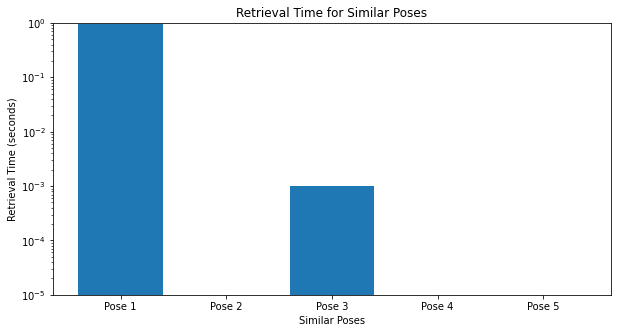

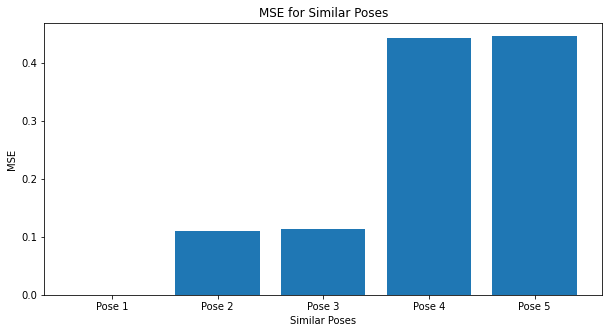

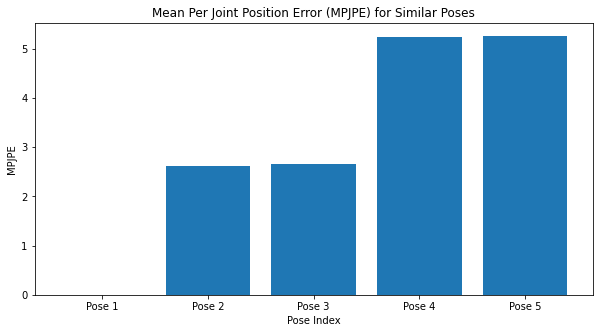

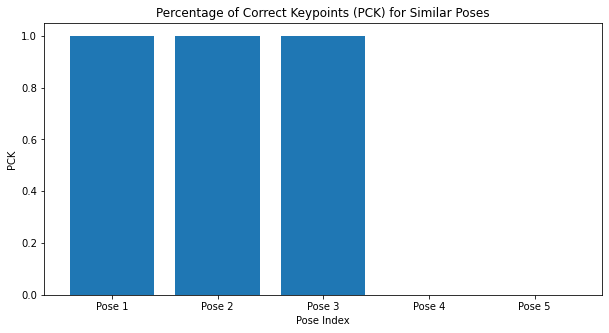

In [189]:
Evaluation_Visualization(retrievalTimes,mseValues,mpjpe_values,pck_values)